<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CHK_ACCT                1000 non-null   int64
 1   Duration                1000 non-null   int64
 2   History                 1000 non-null   int64
 3   Purpose of credit       1000 non-null   int64
 4   Credit Amount           1000 non-null   int64
 5   Balance in Savings A/C  1000 non-null   int64
 6   Employment              1000 non-null   int64
 7   Install_rate            1000 non-null   int64
 8   Marital status          1000 non-null   int64
 9   Real Estate             1000 non-null   int64
 10  Age                     1000 non-null   int64
 11  Other installment       1000 non-null   int64
 12  Num_Credits             1000 non-null   int64
 13  Job                     1000 non-null   int64
 14  Phone                   1000 non-null   int64
 15  Foreign               

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix:
 [[ 28  31]
 [  8 133]]
Accuracy: 0.805
F1 Score: 0.7887471958584987


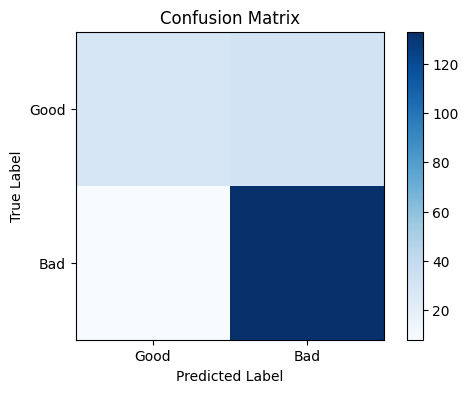

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import joblib

# Load the dataset
credit_card_data = pd.read_excel('credit_rating.xls', sheet_name='Raw_Data')

# Encode categorical variables
lb_encoder = LabelEncoder()
categorical_cols = credit_card_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    credit_card_data[col] = lb_encoder.fit_transform(credit_card_data[col])

# Necessary columns based on correlation
necessary_columns = []
matrix = credit_card_data.corr().to_dict()
for i, j in matrix.items():
    if i == 'Credit classification':
        for j, k in matrix[i].items():
            if abs(k) > 0.03:
                necessary_columns.append(j)
necessary_columns.remove('Credit classification')

credit_card_data[necessary_columns].info()

# Extract features and target variable
features = credit_card_data[necessary_columns]
target = credit_card_data['Credit classification']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLP classifier
classifier = MLPClassifier(hidden_layer_sizes=(125,), activation='relu', solver='adam',
                            batch_size=60, max_iter=100)

classifier.fit(X_train, y_train)

# Make predictions on test data
y_pred = classifier.predict(X_test)

# Evaluate model performance
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Good', 'Bad'])
plt.yticks([0, 1], ['Good', 'Bad'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
credit_card_data['Credit classification']

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Credit classification, Length: 1000, dtype: int64

In [ ]:
x = classifier.predict([[1, 40, 4, 9, 1653, 1, 3, 1, 2, 3, 20, 1, 0, 3, 1, 1]])

In [ ]:
print(x)

[0]


In [ ]:
#importing panda, Flask and other required libraries
import numpy as np
from flask import Flask, request,render_template
#pickle to load the model
import pickle

app=Flask(__name__)

classifier=pickle.load(open("./model/model.pkl",'rb'))

#routing to index.html
@app.route('/')
def home():
    return render_template('index.html')

#on submit the form data will be sent to /predict route with method POST
@app.route('/predict',methods=['POST'])
def predict():
    #Form values will need to first covnvert into float value from string
    form_features=[float(x) for x in request.form.values()]
    features=[np.array(form_features)]
    prediction=classifier.predict(features)

    #predicted as 0 or 1 i.e. Bad or Good respectively
    output=int(prediction[0])
    result=""
    if output==1:
        result="Good"
    else:
        result="Bad"

    #routing the result on 'result.html'
    return render_template('result.html',prediction_text='{}'.format(result))


if __name__=="__main__":
    app.run